In [326]:
import pandas as pd
import os
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [327]:
df = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/raw_data/data_mc.csv', header = None)
# df_test = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/product_review_analysis/raw_data/test_data/test.csv', header=None)
# df_test = df.rename({0: 'label', 1: 'text'}, axis = 1)
df = df.rename({0: 'label', 1: 'text'}, axis = 1)

In [328]:
df = df.dropna()

In [329]:
from nltk.corpus import stopwords 
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize 

def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

In [330]:
df_text = df.label

In [331]:
df_text = pd.DataFrame(df_text)

In [332]:
df_text

label
0     I'm not a huge mcds lover, but I've been to be...
1     Terrible customer service. Î¾I came in at 9:30...
2     First they "lost" my order, actually they gave...
3     I see I'm not the only one giving 1 star. Only...
4     Well, it's McDonald's, so you know what the fo...
...                                                 ...
1520  I enjoyed the part where I repeatedly asked if...
1521  Worst McDonalds I've been in in a long time! D...
1522  When I am really craving for McDonald's, this ...
1523  Two points right out of the gate: 1. Thuggery ...
1524  I wanted to grab breakfast one morning before ...

[1525 rows x 1 columns]

In [333]:
df_text['clean_text'] = df_text.label.apply(clean)
df_text['clean_text'] = df_text['clean_text'].astype('str')

In [334]:
df_text

label  \
0     I'm not a huge mcds lover, but I've been to be...   
1     Terrible customer service. Î¾I came in at 9:30...   
2     First they "lost" my order, actually they gave...   
3     I see I'm not the only one giving 1 star. Only...   
4     Well, it's McDonald's, so you know what the fo...   
...                                                 ...   
1520  I enjoyed the part where I repeatedly asked if...   
1521  Worst McDonalds I've been in in a long time! D...   
1522  When I am really craving for McDonald's, this ...   
1523  Two points right out of the gate: 1. Thuggery ...   
1524  I wanted to grab breakfast one morning before ...   

                                             clean_text  
0     ['huge', 'mcds', 'lover', 'better', 'one', 'fa...  
1     ['terrible', 'customer', 'service', 'came', 's...  
2     ['first', 'lost', 'order', 'actually', 'gave',...  
3     ['see', 'one', 'giving', 'star', 'star', 'need...  
4     ['well', 'mcdonald', 'know', 'food', 'review',...  
...                                                 ...  
1520  ['enjoyed', 'part', 'repeatedly', 'asked', 'ri...  
1521  ['worst', 'mcdonalds', 'long', 'time', 'dirt',...  
1522  ['really', 'craving', 'mcdonald', 'seems', 'cl...  
1523  ['two', 'point', 'right', 'gate', 'thuggery', ...  
1524  ['wanted', 'grab', 'breakfast', 'one', 'mornin...  

[1525 rows x 2 columns]

In [335]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1))

data_vectorized = vectorizer.fit_transform(df_text['clean_text'])

lda_model = LatentDirichletAllocation(n_components=3)

lda_vectors = lda_model.fit_transform(data_vectorized)

In [336]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [337]:
def get_topics(model, vectorizer):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[idx] = [(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-3 - 1:-1]]
    return topics
   

In [338]:
topic = get_topics(lda_model, vectorizer)

In [339]:
topic

{0: [('like', 93.95789851263912),
  ('coffee', 67.4614179387562),
  ('mcdonalds', 64.79005783462118)],
 1: [('time', 258.82468125219845),
  ('order', 251.16101297165596),
  ('get', 176.18175899684493)],
 2: [('food', 716.964099187575),
  ('order', 710.4264108594107),
  ('mcdonald', 653.3549488063188)]}

In [340]:
def get_topics_all(top):
    topics = {}
    for t in top:
        print(top)
        print(top[0])
        top[t] = top[0][0][0]
        print(t)
    return topics

In [341]:
x = get_topics_all(topic)
print(x)

{0: [('like', 93.95789851263912), ('coffee', 67.4614179387562), ('mcdonalds', 64.79005783462118)], 1: [('time', 258.82468125219845), ('order', 251.16101297165596), ('get', 176.18175899684493)], 2: [('food', 716.964099187575), ('order', 710.4264108594107), ('mcdonald', 653.3549488063188)]}
[('like', 93.95789851263912), ('coffee', 67.4614179387562), ('mcdonalds', 64.79005783462118)]
0
{0: 'like', 1: [('time', 258.82468125219845), ('order', 251.16101297165596), ('get', 176.18175899684493)], 2: [('food', 716.964099187575), ('order', 710.4264108594107), ('mcdonald', 653.3549488063188)]}
like
1
{0: 'like', 1: 'l', 2: [('food', 716.964099187575), ('order', 710.4264108594107), ('mcdonald', 653.3549488063188)]}
like
2
{}


In [342]:
print_topics(lda_model, vectorizer)

Topic 0:
[('like', 93.95789851263912), ('coffee', 67.4614179387562), ('mcdonalds', 64.79005783462118), ('place', 61.35953423881151), ('manager', 60.541086323177545), ('go', 51.79308603984012), ('cup', 49.16719394918697), ('cream', 47.04529968041608), ('ice', 39.587078157489714), ('people', 37.6548935992572)]
Topic 1:
[('time', 258.82468125219845), ('order', 251.16101297165596), ('get', 176.18175899684493), ('mcdonald', 168.08294534901776), ('one', 156.41153938803885), ('food', 155.32112350801285), ('go', 132.88495866826003), ('got', 132.13433526862158), ('chicken', 124.51064854372761), ('ordered', 116.39698756420088)]
Topic 2:
[('food', 716.964099187575), ('order', 710.4264108594107), ('mcdonald', 653.3549488063188), ('one', 587.5631830640117), ('drive', 582.736423097918), ('get', 503.7355866504542), ('time', 472.39918663761495), ('service', 457.63753971371085), ('mcdonalds', 428.55612535957346), ('thru', 413.7406037341719)]


IndexError: string index out of range

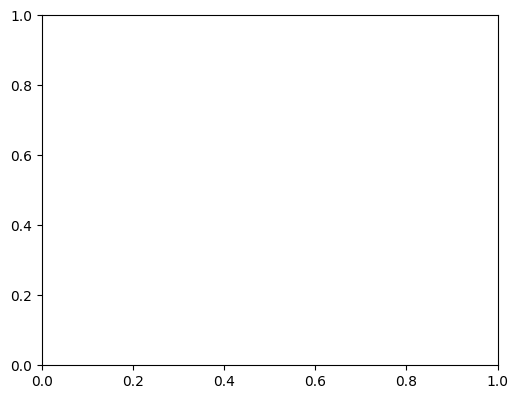

In [343]:
fig = plt.figure(figsize=(20,10))

for key in topic.keys():
    plt.subplot(2, 3, key + 1)
    words = [tup[0] for tup in topic[key]]
    scores = [tup[1] for tup in topic[key]]
    plt.barh(words, scores)
    plt.title(f"Topic {key}")
    

plt.show()

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
from collections import Counter

In [286]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf = tfidf_vectorizer.fit_transform(df_text['label'])
kmeans = KMeans(n_clusters=5).fit(tfidf)

In [287]:
kmeans

KMeans(n_clusters=5)

In [288]:
kmeans.labels_

array([2, 0, 1, ..., 4, 4, 3], dtype=int32)

In [290]:
labels = list(kmeans.labels_)
keys = df_text['label']

In [291]:
c = {}
for i, l in enumerate(labels):
    if c.get(labels[i]) is None:
        w = []
        w.append(keys[i])
        c[labels[i]] = w
    else:
        w = c.get(labels[i])
        w.append(keys[i])
        c[labels[i]] = w

In [292]:
c

{2: ["I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care.",
  'Well, it\'s McDonald\'s, so you know what the food is. Î¾This review reflects solely on the poor service. Î¾I have been to this location countless times over the years. Î¾They consistently fail on the service end of things. Î¾The order takers tend to be rude, no smiles, and a lot of "sighs" and "lip smacking" when you talk to them. Î¾So why go back you ask? This store benefits from being the only place to eat in this area. Î¾The next stop is at least 12 minutes away on the other side of town. Î¾Also I strongly believe in 2nd chances and know that not every business can satisfy everyone 100% of the time. Î¾I have given them many chances at earning a positive review. Î¾I could not recommend this location any less. Î¾If y